In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

symptomsToDisease = pd.read_csv("../data/raw/symptoms/Disease and symptoms dataset.csv")

## Data Exploration

### Data exploration Basic

In [2]:
print(f"Shape: {symptomsToDisease.shape}")
symptom_cols = [c for c in symptomsToDisease.columns if c != "diseases"]
print(f"Symptom columns: {len(symptom_cols)}")

print(f"\nDataset Shape: {symptomsToDisease.shape[0]} rows × {symptomsToDisease.shape[1]} columns")
print(f"Memory Usage: {symptomsToDisease.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Types:")
print(symptomsToDisease.dtypes.value_counts())

print("\nFirst few rows:")
display(symptomsToDisease.head())

Shape: (246945, 376)
Symptom columns: 375

Dataset Shape: 246945 rows × 376 columns
Memory Usage: 724.07 MB

Column Types:
int64     375
object      1
Name: count, dtype: int64

First few rows:


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness,regurgitation,bloating
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Disease Analysis

In [3]:
disease_counts = symptomsToDisease['diseases'].value_counts()
print(f"Unique diseases: {disease_counts.shape[0]}")
print(f"Total diseases: {len(disease_counts)}\n")

Unique diseases: 773
Total diseases: 773



### Disease Distribution

In [4]:
print(f"Most common: {disease_counts.index[0]} ({disease_counts.iloc[0]} cases)")
print(f"Least common: {disease_counts.index[-1]} ({disease_counts.iloc[-1]} cases)")
print(f"Average cases per disease: {disease_counts.mean():.2f}")
print(f"Median cases per disease: {disease_counts.median():.0f}")

print("\nTop 15 Diseases:")
for i, (disease, count) in enumerate(disease_counts.head(15).items(), 1):
    percentage = (count / len(symptomsToDisease)) * 100
    print(f"   {i:2d}. {disease:40s} : {count:4d} cases ({percentage:5.2f}%)")

print("\nBottom 15 Diseases:")
for i, (disease, count) in enumerate(disease_counts.tail(15).items(), 1):
    percentage = (count / len(symptomsToDisease)) * 100
    print(f"   {i:2d}. {disease:40s} : {count:4d} cases ({percentage:5.2f}%)")

Most common: cystitis (1219 cases)
Least common: open wound due to trauma (1 cases)
Average cases per disease: 319.46
Median cases per disease: 168

Top 15 Diseases:
    1. cystitis                                 : 1219 cases ( 0.49%)
    2. vulvodynia                               : 1218 cases ( 0.49%)
    3. nose disorder                            : 1218 cases ( 0.49%)
    4. complex regional pain syndrome           : 1217 cases ( 0.49%)
    5. spondylosis                              : 1216 cases ( 0.49%)
    6. hypoglycemia                             : 1215 cases ( 0.49%)
    7. peripheral nerve disorder                : 1215 cases ( 0.49%)
    8. esophagitis                              : 1215 cases ( 0.49%)
    9. vaginal cyst                             : 1215 cases ( 0.49%)
   10. conjunctivitis due to allergy            : 1215 cases ( 0.49%)
   11. diverticulitis                           : 1214 cases ( 0.49%)
   12. gastrointestinal hemorrhage              : 1214 cases ( 0

In [5]:
print("\nImbalance Ratio (Most/Least common): ", disease_counts.iloc[0] / disease_counts.iloc[-1])
if disease_counts.iloc[0] / disease_counts.iloc[-1] > 10:
    print("Significant class imbalance")
    print("Will fix it using SMOTE")

rare_threshold = 50
rare_diseases = disease_counts[disease_counts < rare_threshold]
print(f"\n🔬 Rare Diseases (<{rare_threshold} samples): {len(rare_diseases)}")
if len(rare_diseases) > 0:
    print(f"   These diseases might be challenging to train on:")
    for disease, count in rare_diseases.items():
        print(f"      - {disease}: {count} samples")


Imbalance Ratio (Most/Least common):  1219.0
Significant class imbalance
Will fix it using SMOTE

🔬 Rare Diseases (<50 samples): 246
   These diseases might be challenging to train on:
      - liver cancer: 49 samples
      - polycythemia vera: 49 samples
      - endometrial hyperplasia: 49 samples
      - intestinal cancer: 49 samples
      - pseudotumor cerebri: 48 samples
      - premature ovarian failure: 48 samples
      - atrophy of the corpus cavernosum: 47 samples
      - amblyopia: 47 samples
      - hypocalcemia: 46 samples
      - scleritis: 46 samples
      - muscular dystrophy: 45 samples
      - mumps: 45 samples
      - hepatic encephalopathy: 45 samples
      - dislocation of the wrist: 45 samples
      - folate deficiency: 44 samples
      - whooping cough: 43 samples
      - erythema multiforme: 43 samples
      - cervical disorder: 43 samples
      - poisoning due to anticonvulsants: 41 samples
      - fracture of the neck: 41 samples
      - anemia of chronic disea

### Symptom Analysis

In [6]:
symptoms_per_patient = symptomsToDisease[symptom_cols].sum(axis=1)
print(f"\n📈 Symptoms per Patient Statistics:")
print(f"   Mean:     {symptoms_per_patient.mean():.2f}")
print(f"   Median:   {symptoms_per_patient.median():.0f}")
print(f"   Std Dev:  {symptoms_per_patient.std():.2f}")
print(f"   Min:      {symptoms_per_patient.min():.0f}")
print(f"   Max:      {symptoms_per_patient.max():.0f}")
print(f"   25th %ile: {symptoms_per_patient.quantile(0.25):.0f}")
print(f"   75th %ile: {symptoms_per_patient.quantile(0.75):.0f}")

zero_symptoms = (symptoms_per_patient == 0).sum()
if zero_symptoms > 0:
    print(f"    {zero_symptoms} patients have no symptoms")
    print(f"    These rows should be removed during cleaning")
else: print("\nNo patients with zero symptoms")




📈 Symptoms per Patient Statistics:
   Mean:     5.32
   Median:   5
   Std Dev:  1.64
   Min:      1
   Max:      12
   25th %ile: 4
   75th %ile: 6

No patients with zero symptoms


In [7]:
symptom_frequencies = symptomsToDisease[symptom_cols].sum().sort_values(ascending=False)

print(f"\nTop 20 Most Common Symptoms:")
for i, (symptom, count) in enumerate(symptom_frequencies.head(20).items(), 1):
    percentage = (count / len(symptomsToDisease)) * 100
    print(f"   {i:2d}. {symptom:45s} : {count:5d} ({percentage:5.2f}%)")

print(f"\nBottom 20 Least Common Symptoms:")
for i, (symptom, count) in enumerate(symptom_frequencies.tail(20).items(), 1):
    percentage = (count / len(symptomsToDisease)) * 100
    print(f"   {i:2d}. {symptom:45s} : {count:5d} ({percentage:5.2f}%)")


Top 20 Most Common Symptoms:
    1. sharp abdominal pain                          : 32307 (13.08%)
    2. vomiting                                      : 27874 (11.29%)
    3. headache                                      : 24719 (10.01%)
    4. cough                                         : 24296 ( 9.84%)
    5. sharp chest pain                              : 24016 ( 9.73%)
    6. nausea                                        : 23687 ( 9.59%)
    7. back pain                                     : 21809 ( 8.83%)
    8. shortness of breath                           : 21346 ( 8.64%)
    9. fever                                         : 20394 ( 8.26%)
   10. dizziness                                     : 17272 ( 6.99%)
   11. abnormal appearing skin                       : 16425 ( 6.65%)
   12. nasal congestion                              : 16200 ( 6.56%)
   13. leg pain                                      : 16189 ( 6.56%)
   14. skin swelling                                 : 15165

In [8]:
rare_symptom_threshold = 5
rare_symptoms = symptom_frequencies[symptom_frequencies <= rare_symptom_threshold]
print(f"\n🔬 Rare Symptoms (≤{rare_symptom_threshold} occurrences): {len(rare_symptoms)}")
if len(rare_symptoms) > 0:
    print(f"   Should remove these during feature selection:")
    for symptom, count in rare_symptoms.items():
        print(f"      - {symptom}: {count} times")


🔬 Rare Symptoms (≤5 occurrences): 55
   Should remove these during feature selection:
      - low back weakness: 5 times
      - itching of scrotum: 4 times
      - wrist weakness: 4 times
      - skin pain: 1 times
      - feeling hot: 1 times
      - thirst: 1 times
      - lump over jaw: 0 times
      - stuttering or stammering: 0 times
      - neck weakness: 0 times
      - low back stiffness or tightness: 0 times
      - skin on head or neck looks infected: 0 times
      - jaw pain: 0 times
      - ankle stiffness or tightness: 0 times
      - back swelling: 0 times
      - problems with orgasm: 0 times
      - elbow lump or mass: 0 times
      - eyelid retracted: 0 times
      - tongue pain: 0 times
      - nose deformity: 0 times
      - hip weakness: 0 times
      - mass on vulva: 0 times
      - sleepwalking: 0 times
      - infrequent menstruation: 0 times
      - swollen tongue: 0 times
      - feeling hot and cold: 0 times
      - elbow cramps or spasms: 0 times
      - na

In [9]:
total_cells = len(symptomsToDisease) * len(symptom_cols)
filled_cells = symptomsToDisease[symptom_cols].sum().sum()
sparsity = 1 - (filled_cells / total_cells)
print(f"\n📊 Data Sparsity: {sparsity*100:.2f}%")
print(f"   (Percentage of zeros in symptom matrix)")
if sparsity > 0.95:
    print(f"   ⚠️  Very sparse data - consider dimensionality reduction")


📊 Data Sparsity: 98.58%
   (Percentage of zeros in symptom matrix)
   ⚠️  Very sparse data - consider dimensionality reduction


### Data Quality

In [10]:
missing_total = symptomsToDisease.isnull().sum().sum()
print(f"Total missing values: {missing_total}")

duplicate_rows = symptomsToDisease.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")
print(f"Duplicates are too many cause of there being many rows of the same disease, this is expected")

print(f"\nData Type Validation:")
non_binary_symptoms = []
for col in symptom_cols:
    unique_vals = symptomsToDisease[col].unique()
    if not set(unique_vals).issubset({0, 1, np.nan}):
        non_binary_symptoms.append((col, unique_vals))

if non_binary_symptoms:
    print(f"{len(non_binary_symptoms)} symptom columns have non-binary values:")
else:
    print(f"All symptom columns are binary (0/1)")



Total missing values: 0
Duplicate rows: 57298
Duplicates are too many cause of there being many rows of the same disease, this is expected

Data Type Validation:
All symptom columns are binary (0/1)


### Sample Records

In [11]:

print("\n📝 Sample Patient Records:")
for idx in [0, len(symptomsToDisease)//4, len(symptomsToDisease)//2, 3*len(symptomsToDisease)//4, len(symptomsToDisease)-1]:
    active_symptoms = symptomsToDisease.iloc[idx][symptom_cols]
    active_symptoms = active_symptoms[active_symptoms == 1].index.tolist()
    
    print(f"\nPatient {idx+1}:")
    print(f"   Disease: {symptomsToDisease.iloc[idx]['diseases']}")
    print(f"   # Symptoms: {len(active_symptoms)}")
    print(f"   Symptoms: {', '.join(active_symptoms[:5])}", end="")
    if len(active_symptoms) > 5:
        print(f" ... (+{len(active_symptoms)-5} more)")
    else:
        print()


📝 Sample Patient Records:

Patient 1:
   Disease: panic disorder
   # Symptoms: 7
   Symptoms: anxiety and nervousness, shortness of breath, depressive or psychotic symptoms, chest tightness, palpitations ... (+2 more)

Patient 61737:
   Disease: diverticulosis
   # Symptoms: 5
   Symptoms: blood in stool, vomiting, diarrhea, heartburn, rectal bleeding

Patient 123473:
   Disease: obstructive sleep apnea (osa)
   # Symptoms: 6
   Symptoms: abnormal involuntary movements, mouth dryness, weight gain, difficulty breathing, apnea ... (+1 more)

Patient 185209:
   Disease: pelvic inflammatory disease
   # Symptoms: 4
   Symptoms: sharp abdominal pain, vomiting, painful urination, intermenstrual bleeding

Patient 246945:
   Disease: open wound of the nose
   # Symptoms: 2
   Symptoms: diminished hearing, facial pain


## Visualizations

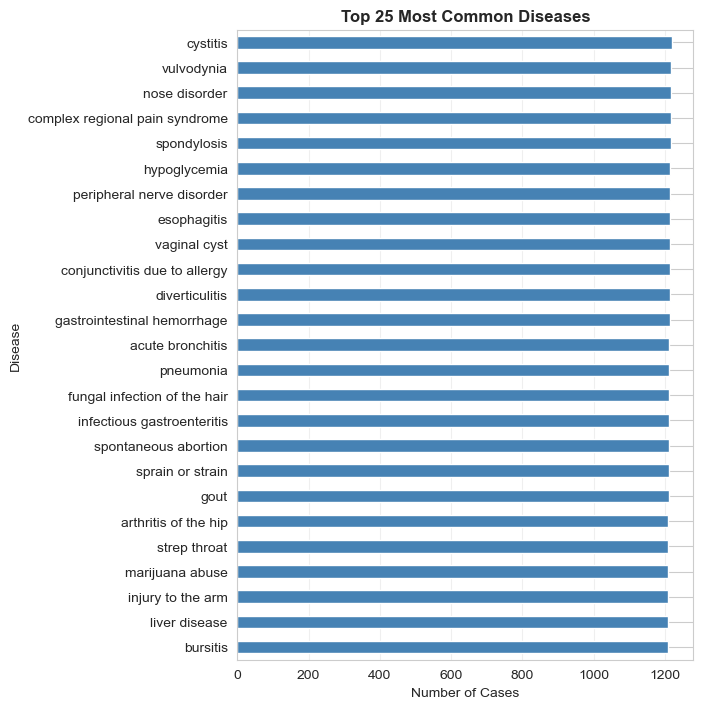

In [12]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20, 18))

ax1 = plt.subplot(2, 3, 1)
disease_counts.head(25).plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Number of Cases', fontsize=10)
ax1.set_ylabel('Disease', fontsize=10)
ax1.set_title('Top 25 Most Common Diseases', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

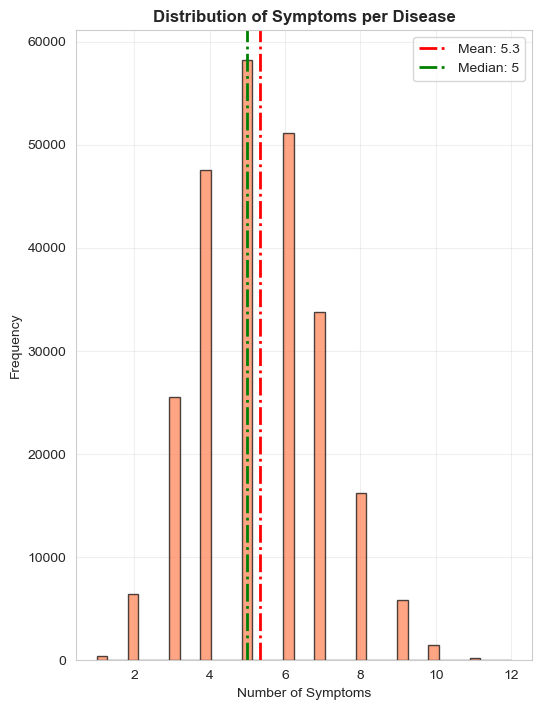

In [13]:
fig = plt.figure(figsize=(20, 18))

ax2 = plt.subplot(2, 3, 2)
symptoms_per_patient.hist(bins=40, ax=ax2, color='coral', edgecolor='black', alpha=0.7)
ax2.axvline(symptoms_per_patient.mean(), color='red', linestyle='-.', linewidth=2, 
            label=f'Mean: {symptoms_per_patient.mean():.1f}')
ax2.axvline(symptoms_per_patient.median(), color='green', linestyle='-.', linewidth=2, 
            label=f'Median: {symptoms_per_patient.median():.0f}')
ax2.set_xlabel('Number of Symptoms', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.set_title('Distribution of Symptoms per Disease', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

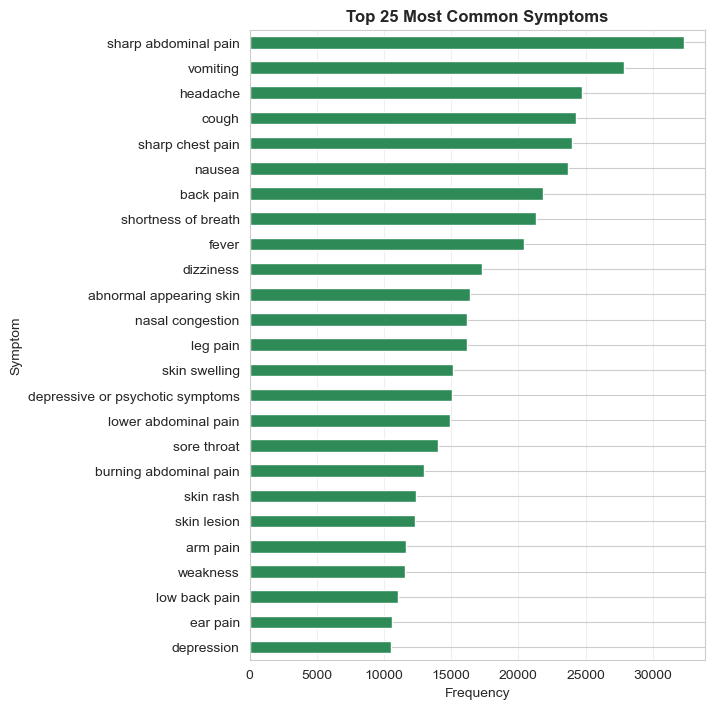

In [14]:
fig = plt.figure(figsize=(20, 18))
ax3 = plt.subplot(2, 3, 3)
symptom_frequencies.head(25).plot(kind='barh', ax=ax3, color='seagreen')
ax3.set_xlabel('Frequency', fontsize=10)
ax3.set_ylabel('Symptom', fontsize=10)
ax3.set_title('Top 25 Most Common Symptoms', fontsize=12, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

In [15]:
# fig = plt.figure(figsize=(20, 18))
# ax4 = plt.subplot(2, 3, 4)
# balance_bins = disease_counts.value_counts().sort_index()
# balance_bins.plot(kind='bar', ax=ax4, color='purple', edgecolor='black')
# ax4.set_xlabel('Number of Cases per Disease', fontsize=10)
# ax4.set_ylabel('Number of Diseases', fontsize=10)
# ax4.set_title('Dataset Balance Analysis', fontsize=12, fontweight='bold')
# ax4.grid(alpha=0.3, axis='y')
# ax4.tick_params(axis='x', rotation=45)

# Not possible due to many unique values

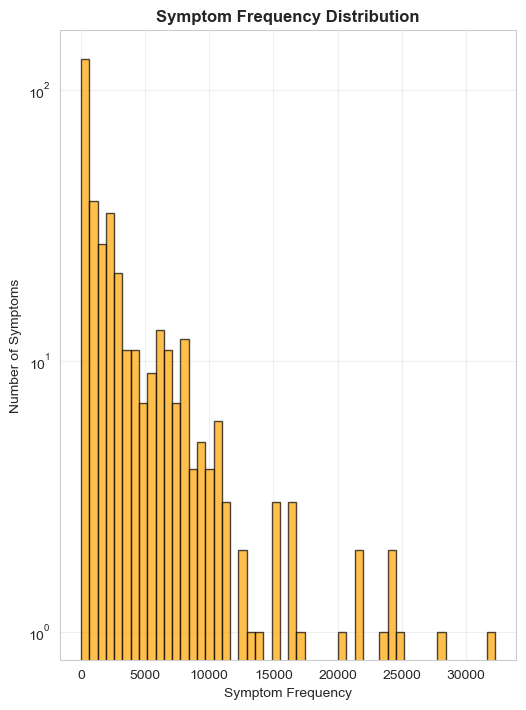

In [16]:
fig = plt.figure(figsize=(20, 18))
ax5 = plt.subplot(2, 3, 5)
symptom_frequencies.hist(bins=50, ax=ax5, color='orange', edgecolor='black', alpha=0.7)
ax5.set_xlabel('Symptom Frequency', fontsize=10)
ax5.set_ylabel('Number of Symptoms', fontsize=10)
ax5.set_title('Symptom Frequency Distribution', fontsize=12, fontweight='bold')
ax5.set_yscale('log')
ax5.grid(alpha=0.3)


📊 Symptom Coverage Analysis:
   Top 116 symptoms cover 80% of all data
   Top 164 symptoms cover 90% of all data
   → Considering feature selectin to reduce from 375 to ~116-164 symptoms

✅ Visualizations saved: ../notebooks/figures/exploration_visualizations.png


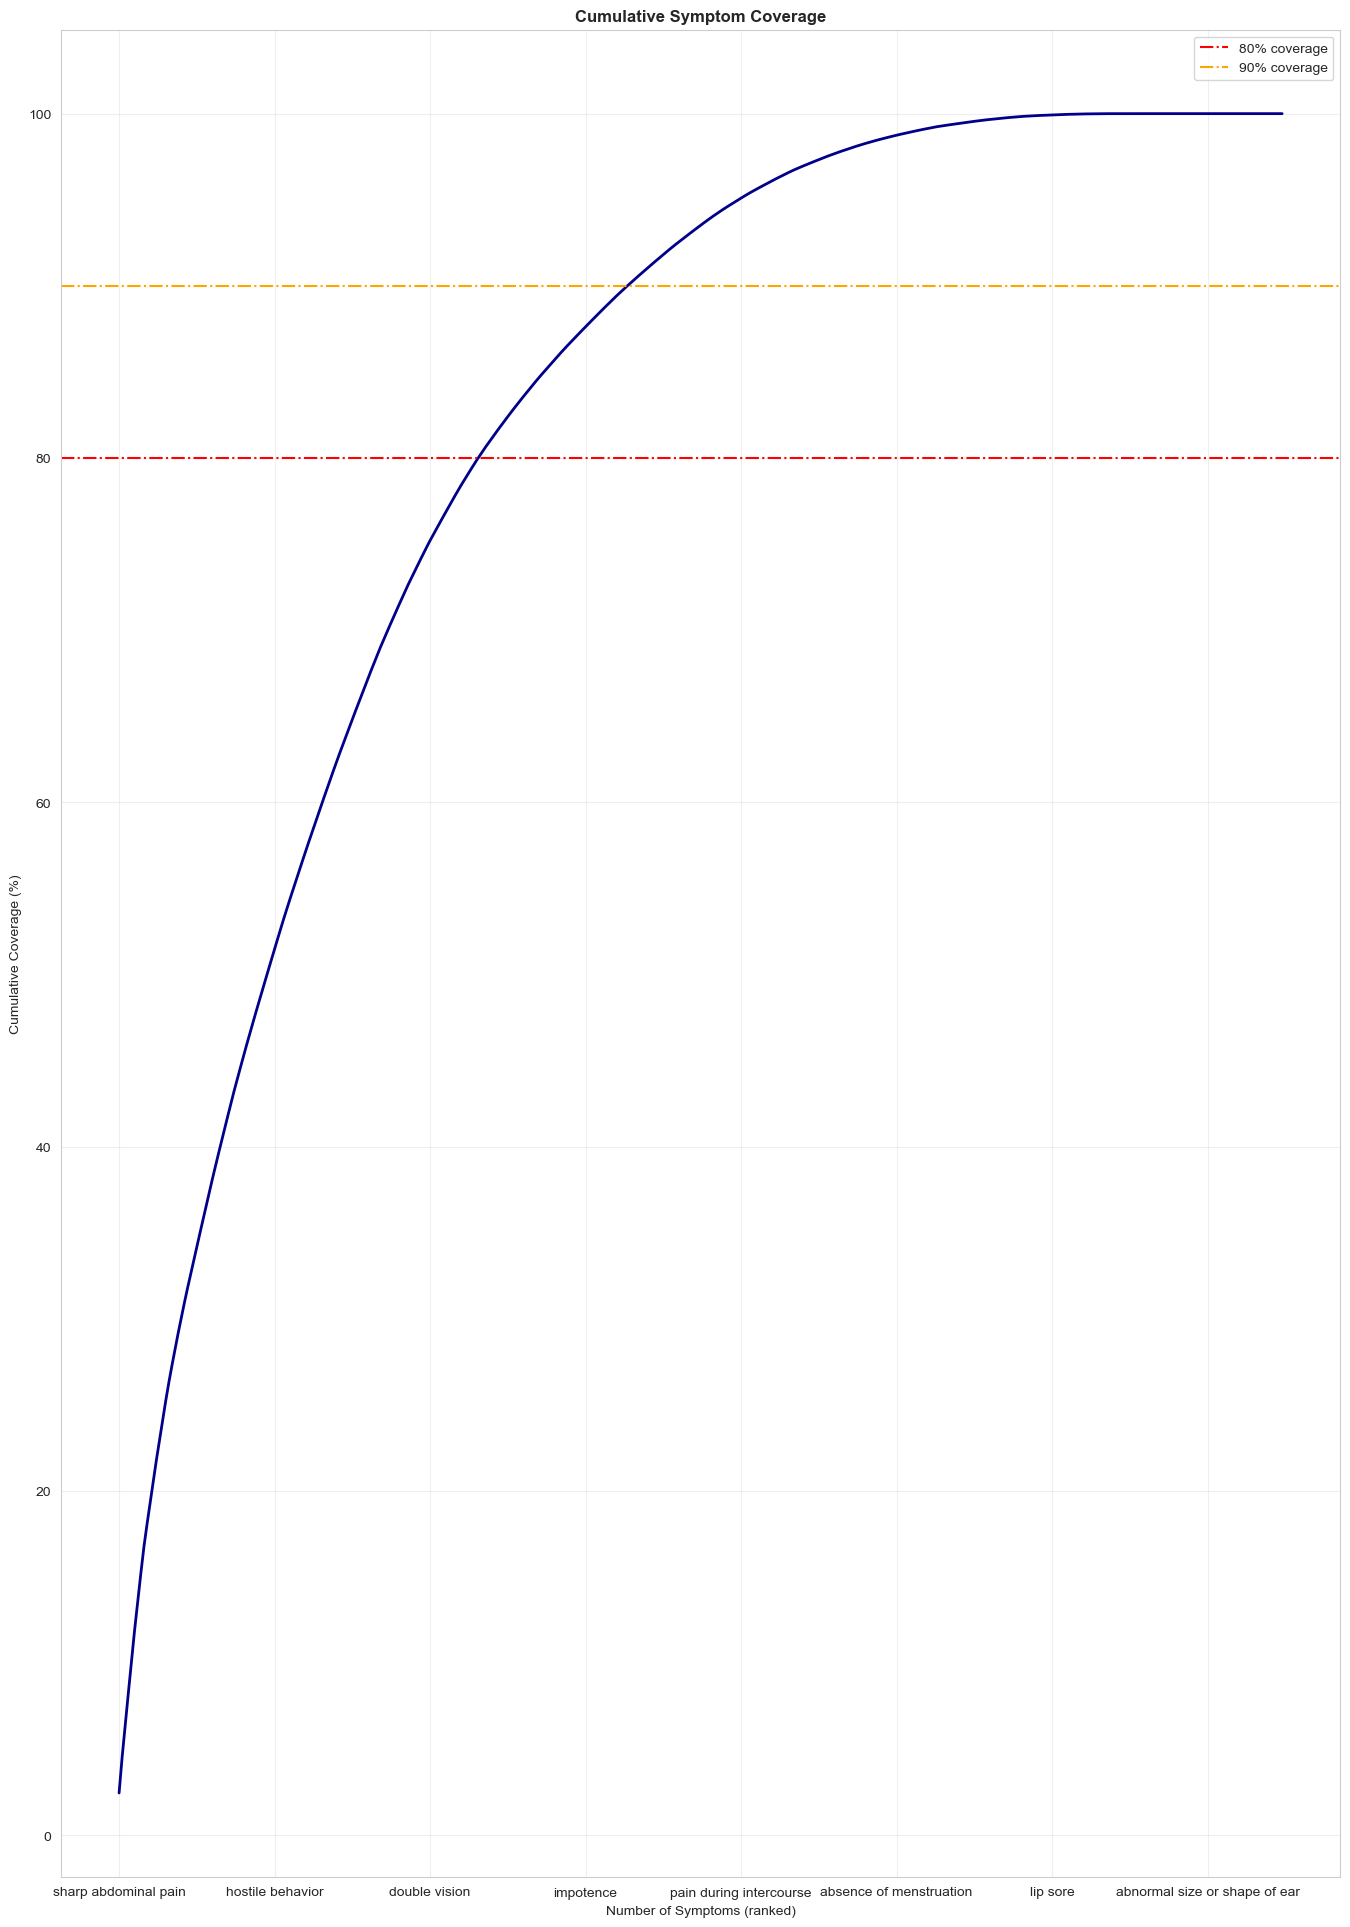

In [17]:
fig = plt.figure(figsize=(40, 38))
ax6 = plt.subplot(2, 3, 6)
cumsum_symptoms = symptom_frequencies.cumsum() / symptom_frequencies.sum() * 100
cumsum_symptoms.plot(ax=ax6, color='darkblue', linewidth=2)
ax6.axhline(80, color='red', linestyle='-.', label='80% coverage')
ax6.axhline(90, color='orange', linestyle='-.', label='90% coverage')
ax6.set_xlabel('Number of Symptoms (ranked)', fontsize=10)
ax6.set_ylabel('Cumulative Coverage (%)', fontsize=10)
ax6.set_title('Cumulative Symptom Coverage', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

symptoms_for_80 = (cumsum_symptoms <= 80).sum()
symptoms_for_90 = (cumsum_symptoms <= 90).sum()
print(f"\n📊 Symptom Coverage Analysis:")
print(f"   Top {symptoms_for_80} symptoms cover 80% of all data")
print(f"   Top {symptoms_for_90} symptoms cover 90% of all data")
print(f"   → Considering feature selectin to reduce from {len(symptom_cols)} to ~{symptoms_for_80}-{symptoms_for_90} symptoms")

plt.tight_layout()
plt.savefig('../notebooks/figures/exploration_visualizations.png', dpi=300, bbox_inches='tight')
print(f"\n✅ Visualizations saved: ../notebooks/figures/exploration_visualizations.png")
plt.show()